In [154]:
from SAFEpython.util import empiricalcdf, split_sample


def pawn_plot_cdf(X, Y, n, n_col=5, Y_Label=['fraction','reciprocity','transitivity', 'specify'], cbar=False,
                  labelinput=''):

    mpl.rcParams['font.family'] = 'Avenir'
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.linewidth'] = 2

    """ This function computes and plots the unconditional output Cumulative
    Distribution Funtions (i.e. when all inputs vary) and the conditional CDFs
    (when one input is fixed to a given conditioning interval, while the other
    inputs vary freely).

    The function splits the output sample to create the conditional output
    by calling internally the function PAWN.pawn_split_sample. The splitting
    strategy is an extension of the strategy for uniformy distributed inputs
    described in Pianosi and Wagener (2018) to handle inputs sampled from any
    distribution.
    (see help of PAWN.pawn_split_sample for further explanation).

    The sensitivity indices for the PAWN method (KS statistic) measures the
    distance between these conditional and unconditional output CDFs
    (see help of PAWN.pawn_indices for further details and reference).

    Usage:
    YF, FU, FC, xc = PAWN.pawn_plot_cdf(X, Y, n, n_col=5, Y_Label='output y',
                                        cbar=False, labelinput='')

    Input:
             X = set of inputs samples                     - numpy.ndarray(N,M)
             Y = set of output samples                     - numpy.ndarray(N,)
                                                        or - numpy.ndarray(N,1)
             n = number of conditioning intervals
                 - integer if all inputs have the same number of groups
                 - list of M integers otherwise

    Optional input:
         n_col = number of panels per row in the plot      - integer
                 (default: min(5, M))
       Y_Label = legend for the horizontal axis            - string
                 (default: 'output y')
          cbar = flag to add a colobar that indicates the  - boolean
                 centers of the conditioning intervals for
                 the different conditional CDFs:
                 - if True = colorbar
                 - if False = no colorbar
    labelinput = label for the axis of colorbar (input    - list (M elements)
                 name) (default: ['X1','X2',...,XM'])

    Output:
            YF = values of Y at which the CDFs FU and FC   - numpy.ndarray(P, )
                 are given
            FU = values of the empirical unconditional     - list(M elements)
                 output CDFs. FU[i] is a numpy.ndarray(P, )
                 (see the Note below for further
                 explanation)
            FC = values of the empirical conditional       - list(M elements)
                 output CDFs for each input and each
                 conditioning interval.
                 FC[i] is a list of n_eff[i] CDFs
                 conditional to the i-th input.
                 FC[i][k] is obtained by fixing the i-th
                 input to its k-th conditioning interval
                 (while the other inputs vary freely),
                 and it is a np.ndarray of shape (P, ).
                 (see the Note below for further
                 explanation)
           xc = subsamples' centers (i.e. mean value of    - list(M elements)
                Xi over each conditioning interval)
                xc[i] is a np.ndarray(n_eff[i],) and
                contains the centers for the n_eff[i]
                conditioning intervals for the i-th input.

    Note:
    (*)  For each input, the number of conditioning intervals which is actually
         used (n_eff[i]) may be lower than the prescribed number of conditioning
         intervals (n[i]) to ensure that input values that are repeated several
         time belong to the same group.
         See the help of PAWN.pawn_split_sample for further details.

    (**) FU[i] and FC[i][k] (for any given i and k) are built using the same
         number of data points so that two CDFs can be compared by calculating
         the KS statistic (see help of PAWN.pawn_ks and PAWN.pawn_indices
         for further explanation on the calculation of the KS statistic).

    Example:

    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as st
    from SAFEpython.sampling import AAT_sampling
    from SAFEpython.model_execution import model_execution
    from SAFEpython import PAWN
    from SAFEpython.plot_functions import boxplot1
    from SAFEpython.ishigami_homma import ishigami_homma_function

    # Create a generic input-output sample:
    N = 1000 # number of samples
    M = 3 # number of inputs
    xmin = -np.pi; xmax = np.pi
    X = AAT_sampling('lhs', M, st.uniform, [xmin, xmax - xmin], N);
    Y = model_execution(ishigami_homma_function, X)

    # Calculate and plot CDFs
    n = 10 # number of conditioning intervals
    YF, FU, FC, xc = PAWN.pawn_plot_cdf(X, Y, n)
    YF, FU, FC, xc = PAWN.pawn_plot_cdf(X, Y, n, cbar=True) # Add colorbar

    This function is part of the SAFE Toolbox by F. Pianosi, F. Sarrazin
    and T. Wagener at Bristol University (2015).
    SAFE is provided without any warranty and for non-commercial use only.
    For more details, see the Licence file included in the root directory
    of this distribution.
    For any comment and feedback, or to discuss a Licence agreement for
    commercial use, please contact: francesca.pianosi@bristol.ac.uk
    For details on how to cite SAFE in your publication, please see:
    https://www.safetoolbox.info"""

    # Options for the graphic
    pltfont = {'fontname': 'DejaVu Sans', 'fontsize': 15} # font
    colorscale = 'gray' # colorscale
    # Text formating of ticklabels
    yticklabels_form = '%3.1f' # float with 1 character after decimal point
    # yticklabels_form = '%d' # integer

    ###########################################################################
    # Check inputs and split the input sample
    ###########################################################################

    YY, xc, NC, n_eff, Xk, XX = PAWN.pawn_split_sample(X, Y, n) # this function
    # checks inputs X, Y and n

    Nx = X.shape
    N = Nx[0]
    M = Nx[1]

    ###########################################################################
    # Check optional inputs for plotting
    ###########################################################################

#     if not isinstance(n_col, (int, np.int8, np.int16, np.int32, np.int64)):
#         raise ValueError('"n_col" must be scalar and integer.')
#     if n_col < 0:
#         raise ValueError('"n_col" must be positive.')
#     if not isinstance(Y_Label, str):
#         raise ValueError('"Y_Label" must be a string.')
#     if not isinstance(cbar, bool):
#         raise ValueError('"cbar" must be scalar and boolean.')
#     if not labelinput:
#         labelinput = [np.nan]*M
#         for i in range(M):
#             labelinput[i] = 'X' + str(i+1)
#     else:
#         if not isinstance(labelinput, list):
#             raise ValueError('"labelinput" must be a list with M elements.')
#         if not all(isinstance(i, str) for i in labelinput):
#             raise ValueError('Elements in "labelinput" must be strings.')
#         if len(labelinput) != M:
#             raise ValueError('"labelinput" must have M elements.')

    ###########################################################################
    # Compute CDFs
    ###########################################################################

    # Set points at which the CDFs will be evaluated:
    YF = np.unique(Y)

    
    # Compute conditional CDFs:
    FC = [np.nan] * M

    for i in range(M): # loop over inputs
        
        FC[i] = [np.nan] * n_eff[i]

        for k in range(n_eff[i]): # loop over conditioning intervals
            FC[i][k] = empiricalcdf(YY[i][k], YF)

    
    # Initialize unconditional CDFs:
    FU = [np.nan] * M

    # M unconditional CDFs are computed (one for each input), so that for
    # each input the conditional and unconditional CDFs are computed using the
    # same number of data points (when the number of conditioning intervals
    # n_eff[i] varies across the inputs, so does the shape of the conditional
    # outputs YY[i]).

    # Determine the sample size for the unconditional output NU:
    NU = [int(np.min(i)) for i in NC] # numpy.ndarray(M,)
    # NU is equal to the sample size of the conditional outputs NC, or its
    # minimum value across the conditioning intervals when the sample size
    # varies across conditioning intervals as may happen when values of an
    # input are repeated several times (more details on this in the Note in the
    #  help of the function).

    # To reduce the computational time (the calculation of empirical CDF is
    # costly), the unconditional CDF is computed only once for all inputs that
    # have the same value of NU[i].
    NU_unique = np.unique(NU)
    N_compute = len(NU_unique) # number of unconditional CDFs that will be computed

    for kk in range(N_compute): # loop over the sizes of the unconditional output

        # Extract an unconditional sample of size NU_unique[kk] by drawing data
        # points from the full sample Y without replacement
        idx = np.random.choice(np.arange(0, N, 1), size=(NU_unique[kk], ),
                               replace='False')
        # Compute unconditional output CDF:
        FUkk = empiricalcdf(Y[idx], YF)
        # Associate the FUkk to all inputs that require an unconditional output
        # of size NU_unique[kk]:
        idx_input = np.where([i == NU_unique[kk] for i in NU])[0]
        for j in range(len(idx_input)):
            FU[idx_input[j]] = FUkk

    ###########################################################################
    # Plot
    ###########################################################################



    n_col = min(n_col, M) # n_col <= M
    n_row = int(np.ceil(M/n_col))


    print(M)
    print('haha')
    for i in range(M): # loop over inputs
        
        # Prepare color and legend
        cmap = mpl.cm.get_cmap(colorscale, n_eff[i]+1) # return colormap,
        # (n+1) so that the last line is not white
        # Make sure that subsample centers are ordered:
        iii = np.argsort(xc[i])
        ccc = np.sort(xc[i])
        plt.xticks(rotation=70)
        plt.subplot(n_row, n_col, i+1)
        ax = plt.gca()

        if cbar: # plot dummy mappable to generate the colorbar
            Map = plt.imshow(np.array([[0, 1]]), cmap=cmap)
            plt.cla() # clear axes (do not display the dummy map)

        # Plot a horizontal dashed line at F=1:
        plt.plot(YF, np.ones(YF.shape), '--k')

        # Plot conditional CDFs in gray scale:
        for k in range(n_eff[i]):
            plt.plot(YF, FC[i][iii[k]], color=cmap(k), linewidth=2)

        plt.xticks(**pltfont); plt.yticks(**pltfont)
        plt.xlabel(Y_Label[i], **pltfont)

        # Plot unconditional CDF in red:
        plt.plot(YF, FU[i], 'r', linewidth=3)

        plt.xlim([min(YF), max(YF)]); plt.ylim([-0.02, 1.02])

        
        if cbar: # Add colorbar to the left
             cb_ticks = [' '] * n_eff[i]
             for k in range(n_eff[i]):
                 cb_ticks[k] = yticklabels_form % ccc[k]
             # Add colorbar (do not display the white color by adjuting the
             # input argument 'boundaries')
             cb = plt.colorbar(Map, ax=ax,
                               boundaries=np.linspace(0, 1-1/((n_eff[i]+1)),
                                                      n_eff[i]+1))
             cb.set_label(labelinput[i], **pltfont)
             cb.Fontname = pltfont['fontname']
             # set tick labels at the center of each color:
             cb.set_ticks(np.linspace(1/(2*(n_eff[i]+1)), 1-3/(2*(n_eff[i]+1)),
                                      n_eff[i]))
             cb.set_ticklabels(cb_ticks)
             cb.ax.tick_params(labelsize=pltfont['fontsize'])
             # Map.set_clim(0,1-1/(n+1))
             ax.set_aspect('auto') # Ensure that axes do not shrink
    plt.savefig('x.pdf')
    return YF, FU, FC, xc

In [155]:
# import sys
import math
from SALib.analyze import pawn
from SAFEpython import PAWN
import numpy as np
import pandas as pd
from SALib.analyze import sobol

import matplotlib as mpl
import matplotlib.font_manager as fm#  Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.font"] = "Computer Modern Roman"
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

df_output = pd.read_csv("..\Experiment_huishouden\output.txt", sep=",")
# sys.path.append('../..')

print(df_output.columns)

df_input = pd.read_csv("..\Experiment_huishouden\input.txt", sep=",")

print(df_input.columns)


reciprocity = []
fraction = []
transitivity = []
specify = []



type_output = []
values = []
parameter = []


for output in df_output.columns:

    problem = {
      'num_vars': 4,
      'names': ['fraction', 'reciprocity','transitivity' ,'specify'],
      'bounds': [[0,1]]*4
    }
    # np.loadtxt('')
    # array([[0., 1.],
    #        [2., 3.]])





    # X = np.random.rand(100, 4)

    # Y = np.random.rand(100)
    
    
    
    

    Y = np.array(df_output[output])[40:800]

    X = df_input.to_numpy()[40:800]
    
    print(output)
    
#     print(X.type())
    
    if output == 'S_am' or output == 'max' or output == 'N':
        continue
        

#     Y = np.array(df_output[output])[75:].astype(float)

#     X = df_input.to_numpy()[75:].astype(float)

    
#         print(X,Y)
    
    c = 0
    
    for i in PAWN.pawn_indices(X, Y, 10, 100):


        print(np.mean(i[:,0]), np.mean(i[:,1]), np.mean(i[:,2]))
        if c == 1:

            fraction.extend(i[:,0])
            reciprocity.extend(i[:,1])
            transitivity.extend(i[:,2])
            specify.extend(i[:,-1])
            
            values.extend(i[:,0])
            parameter.extend(['Fraction']*100)
            values.extend(i[:,1])
            parameter.extend(['Reciprocity']*100)
            values.extend(i[:,2])
            parameter.extend(['Transitivity']*100)
            values.extend(i[:,3])
            parameter.extend(['Specification']*100)
            
        c+=1
    
    type_output.extend([output]*400)




Index(['N', 'R', 'T', 'M', 'A', 'S', 'S_am', 'max', 'skew_a', 'skew_g'], dtype='object')
Index(['fraction', 'reciprocity', 'transitivity', 'specification'], dtype='object')
N
R


C:\Users\KGulp\Documents\Computational Science\CLS_thesis\Notebooks\SAFEpython\PAWN.py:206: UserWarning: For X4, 1 groups were used instead of 10 so that values that are repeated several time belong to the same group
  warn("For X%d, %d groups were used instead of " % (i+1, n_eff[i]) +


0.17566739436835493 0.5057569789009427 0.2534748502466526
0.179649879737721 0.5374658441491696 0.2711122076426551
0.2564890308545516 0.8461363636363637 0.450702842377261
T
0.18501746164884433 0.18674812358085952 0.652068748659497
0.18842405181746688 0.19483063427989422 0.6507271801687247
0.2708421908672161 0.2967292490118577 0.8879350775193798
M
0.18069621965356297 0.21662100830226408 0.45493483495215037
0.20047197939965888 0.22892072424055537 0.4562222603946441
0.3579008397932816 0.39795454545454534 0.6424940175261207
A
0.2264344896130159 0.1748834021295284 0.5332537502170339
0.26492467202357245 0.18212922097945236 0.5194340963987704
0.5962842377260982 0.2764027777777778 0.7012591984046737
S
0.17846139287209817 0.17870333246900086 0.23175341126124743
0.1928872347080512 0.1899407502406115 0.23269713349368298
0.34960678575440957 0.31015582513385476 0.3551806436457599
S_am
max
skew_a
0.4026789105667391 0.1632711586260384 0.33363407584438926
0.4414874214848178 0.17483576514450708 0.353382

In [156]:
# print(fraction)


df = pd.DataFrame()

df['Metric'] = type_output
df['Parameter'] = parameter
df['median KS'] = values
# df['specify'] = specify


# df[df['Metric'] == 'T']


df

,Metric,Parameter,median KS
0,R,Fraction,0.200686
1,R,Fraction,0.179209
2,R,Fraction,0.176643
3,R,Fraction,0.209071
4,R,Fraction,0.177320
...,...,...,...
2795,skew_g,Specification,0.039648
2796,skew_g,Specification,0.022026
2797,skew_g,Specification,0.037445
2798,skew_g,Specification,0.024229


In [87]:
df_output.to_csv('df_output.txt', index = False)

[Text(0, 0, 'R'),
 Text(1, 0, 'T'),
 Text(2, 0, 'M'),
 Text(3, 0, 'A'),
 Text(4, 0, 'S'),
 Text(5, 0, 'skew_a'),
 Text(6, 0, 'skew_g')]

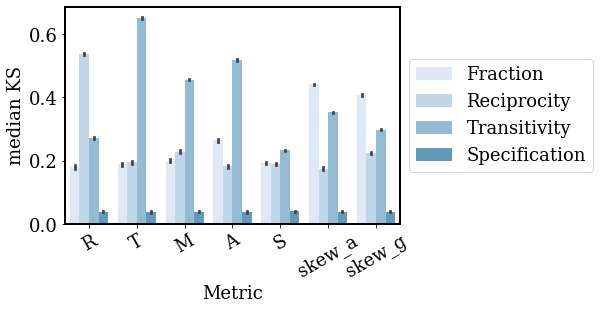

In [179]:
import seaborn as sn

sn.set_palette("Blues")

# g = sn.pointplot(
#     data=df,y = parameter, x= values, alpha = 0.01, hue='Metric', dodge=True, join=False, cl ='99')
# plt.setp(g.collections, alpha=.6)
# plt.setp(g.lines, alpha=.6)  

g = sn.barplot(y='median KS', x='Metric', hue="Parameter", data=df)


g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
g.set_xticklabels(g.get_xticklabels(),rotation = 30)



[Text(0.5, 1.0, '$Specification$')]

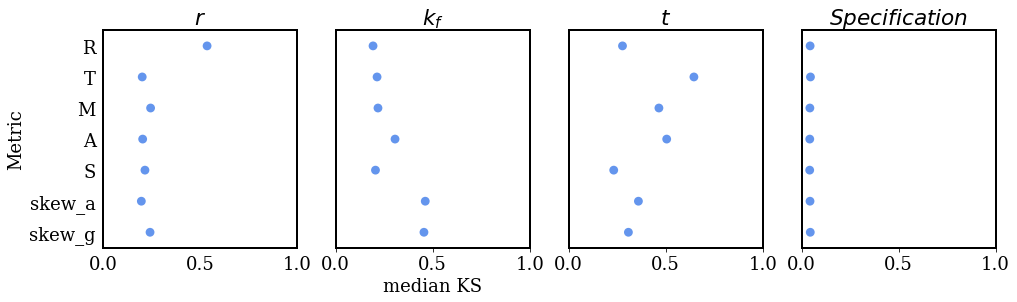

In [151]:
plt.figure(figsize=(16,4))

plt.subplot(141)

g1 = sn.pointplot(data=df[df['Parameter'] == 'Reciprocity'], x = 'median KS', y = 'Metric', alpha = 1, dodge=True, join=False, cl ='99', color = 'cornflowerblue')
# g1.set(ylabel=None)
g1.set(title='$r$')
g1.set(xlabel=None)
g1.set(xlim=(0, 1))

g1.tick_params(left=False, bottom=False)

plt.subplot(142)
g2 = sn.pointplot(data=df[df['Parameter'] == 'Fraction'], x = 'median KS', y = 'Metric', alpha = 1, dodge=True, join=False, cl ='99', color = 'cornflowerblue')
g2.set(ylabel=None)
g2.set(title='$k_f$')
g2.set(yticks=[])
g2.set(xlim=(0, 1))


plt.subplot(143)
g3 = sn.pointplot(data=df[df['Parameter'] == 'Transitivity'], x = 'median KS', y = 'Metric', alpha = 1, dodge=True, join=False, color = 'cornflowerblue')
g3.set(ylabel=None)
g3.set(xlabel=None)
g3.set(yticks=[])
g3.set(xlim=(0, 1))
g3.set(title='$t$')
# plt.tight_layout()


plt.subplot(144)
g3 = sn.pointplot(data=df[df['Parameter'] == 'Specification'], x = 'median KS', y = 'Metric', alpha = 1, dodge=True, join=False, color = 'cornflowerblue')
g3.set(ylabel=None)
g3.set(xlabel=None)
g3.set(yticks=[])
g3.set(xlim=(0, 1))
g3.set(title='$Specification$')

# plt.savefig('../Figures/SA/')
# plt.show()

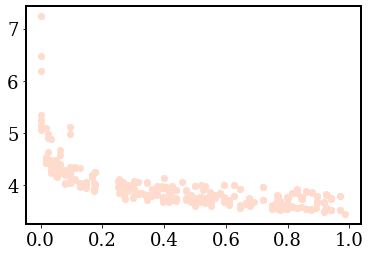

In [153]:

Y = np.array(df_output['skew_a'])[40:]

X = df_input.to_numpy()[40:]

plt.scatter(X[:,0], Y)

In [104]:
print(X.shape,Y.shape)

YF, FU, FC, xc = pawn_plot_cdf(X, Y, 10, cbar=False)

plt.xticks(rotation=70)
plt.tight_layout()


(40, 4) (40,)


C:\Users\KGulp\Documents\Computational Science\CLS_thesis\Notebooks\SAFEpython\PAWN.py:206: UserWarning: For X1, 9 groups were used instead of 10 so that values that are repeated several time belong to the same group
  warn("For X%d, %d groups were used instead of " % (i+1, n_eff[i]) +
C:\Users\KGulp\Documents\Computational Science\CLS_thesis\Notebooks\SAFEpython\PAWN.py:206: UserWarning: For X4, 4 groups were used instead of 10 so that values that are repeated several time belong to the same group
  warn("For X%d, %d groups were used instead of " % (i+1, n_eff[i]) +


IndexError: index 0 is out of bounds for axis 0 with size 0

(852, 4) (852,)
4
haha


C:\Users\KGulp\Documents\Computational Science\CLS_thesis\Notebooks\SAFEpython\PAWN.py:206: UserWarning: For X4, 3 groups were used instead of 10 so that values that are repeated several time belong to the same group
  warn("For X%d, %d groups were used instead of " % (i+1, n_eff[i]) +


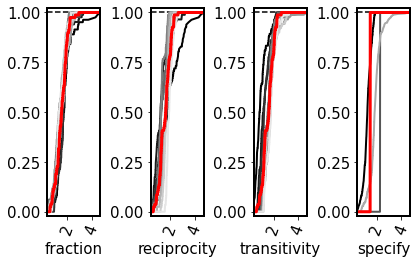

In [276]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [449]:
# Output is vertical so mean median max for x1 is [0,0], [1,0], [2,0]
# Vertical 1 = fraction
# Vertical 2 = reciprocity
# Vertical 3 = Specify

mean = []
minn = []
maxx = []
c = 0

reciprocity = []
fraction = []
specify = []
for i in PAWN.pawn_indices(X, Y, 5, 100):
    
    
    print(np.mean(i[:,0]), np.mean(i[:,1]), np.mean(i[:,2]))
    if c == 1:
        
        fraction.extend(i[:,0])
        reciprocity.extend(i[:,1])
        specify.extend(i[:,2])
        
        mean.extend([mean_confidence_interval(i[:,0])[0], mean_confidence_interval(i[:,1])[0], mean_confidence_interval(i[:,2])[0]])
        minn.extend([mean_confidence_interval(i[:,0])[1], mean_confidence_interval(i[:,1])[1], mean_confidence_interval(i[:,2])[1]])
        maxx.extend([mean_confidence_interval(i[:,0])[2], mean_confidence_interval(i[:,1])[2], mean_confidence_interval(i[:,2])[2]])

        
        
    c+=1
    
# PAWN.pawn_indices(X, Y, 5)

0.29132193920640387 0.20905706500470445 0.4275444675444676
0.31139370393720545 0.21718822617174166 0.4275444675444676
0.44279941976790715 0.32855544675642606 0.47144606144606144


C:\Users\KGulp\Documents\Computational Science\CLS_thesis\Notebooks\SAFEpython\PAWN.py:206: UserWarning: For X3, 2 groups were used instead of 5 so that values that are repeated several time belong to the same group
  warn("For X%d, %d groups were used instead of " % (i+1, n_eff[i]) +


In [450]:
df = pd.DataFrame()

df['reciprocity'] = reciprocity
df['fraction'] = fraction
df['specify'] = specify


# import seaborn as sn

# # sn.pointplot(
#     data=df, hue='type', dodge=True, join=False)

# df

In [333]:
mean_confidence_interval(PAWN.pawn_indices(X, Y, 5, 1000)[0][:,0])

(0.22820488903758224, 0.2244213067733236, 0.2319884713018409)

In [77]:
from SALib.sample import saltelli
from SALib.test_functions import Ishigami
problem = {
  'num_vars': 4,
  'names': ['x1', 'x2', 'x3', 'x4'],
  'bounds': [[0,1], [0,1],[0,1], [0,1]]
}

# Generate samples
param_values = saltelli.sample(problem, 100)

len(param_values)

C:\Users\KGulp\anaconda3\lib\site-packages\SALib\sample\saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (100) is equal to `2^n`.
        
  warnings.warn(msg)


1000

In [321]:

# plt.tight_layout()

plt.show()

(array([0.27586207, 0.30967742, 0.51609907]),
 array([0.27172753, 0.41750444, 0.51609907]),
 array([0.37744641, 0.84375   , 0.6       ]))

0.2646803444510341 0.37577663481467594 0.5031498452012384
0.2803133966882243 0.422082336091328 0.5031498452012384
0.4176356166511339 0.7102518569609507 0.5495417956656347


In [186]:
 PAWN.pawn_indices(X, Y, 5, 1)

(array([0.375, 0.5  , 0.5  ]),
 array([0.43071895, 0.45962733, 0.5       ]),
 array([0.63888889, 0.5       , 0.54285714]))

In [21]:
Si = sobol.analyze(Y, Y, print_to_console=True)

AttributeError: 'numpy.ndarray' object has no attribute 'get'

[0.2483797991465784, 0.40221813416816876, 0.4969812925170068] [0, 1, 2]


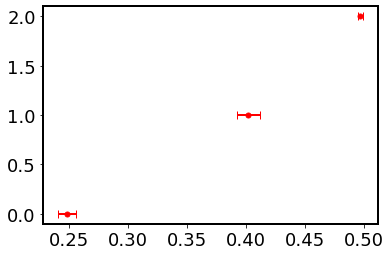

In [334]:
import matplotlib.pyplot as plt
  
a = mean
b = [i for i in range(len(Si['CV']))]

print(a, b)
# plt.scatter(a, b)
  
c = [np.array(mean) - np.array(minn),  np.array(maxx) - np.array(mean)] 
  

plt.errorbar(a, b, xerr=c, color='red', fmt='.', markersize='10', ecolor='red',capsize=4, elinewidth=2)
import seaborn as snplt.show()

,reciprocity,fraction,specify
0,0.658503,0.302231,0.173469
1,0.652722,0.333536,0.182627
2,0.626427,0.280763,0.171245
3,0.621003,0.285932,0.177721
4,0.625170,0.316979,0.176675
...,...,...,...
95,0.641837,0.285526,0.195840
96,0.643264,0.282911,0.176282
97,0.650170,0.336040,0.179683
98,0.646003,0.271920,0.174843


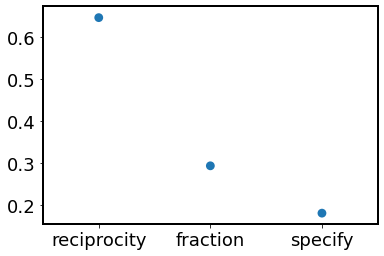

In [488]:
problem = {
  'num_vars': 3,
  'names': ['x1', 'x2', 'x3'],
  'bounds': [[0,1], [0,1], [0,1]]
}

# Generate samples
param_values = saltelli.sample(problem, 63)

param_values.shape

(504, 3)